# Comparative Analysis
In this notebook, we compare ClaSS with different parameter settings.

In [2]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
ds = np.arange(1_000, 20_000 + 1, 1_000)
methods = list()

for n_timepoints in ds:
    candidate_name = f"{n_timepoints}-timepoints"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../tmp/sliding_window/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,1000-timepoints,2000-timepoints,3000-timepoints,4000-timepoints,5000-timepoints,6000-timepoints,7000-timepoints,8000-timepoints,9000-timepoints,...,11000-timepoints,12000-timepoints,13000-timepoints,14000-timepoints,15000-timepoints,16000-timepoints,17000-timepoints,18000-timepoints,19000-timepoints,20000-timepoints
0,DodgerLoopDay,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,EEGRat,0.738,0.885,0.885,0.885,0.885,0.885,0.885,0.885,0.885,...,0.885,0.885,0.885,0.885,0.885,0.885,0.885,0.885,0.885,0.885
2,EEGRat2,0.724,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,...,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739
3,FaceFour,0.458,0.950,0.814,0.814,0.814,0.751,0.748,0.748,0.741,...,0.741,0.741,0.741,0.741,0.741,0.741,0.741,0.741,0.741,0.741
4,GrandMalSeizures2,0.838,0.752,0.752,0.752,0.724,0.753,0.765,0.762,0.763,...,0.732,0.732,0.732,0.732,0.732,0.732,0.732,0.732,0.732,0.732
5,GreatBarbet1,0.756,0.877,0.878,0.857,0.877,0.877,0.877,0.877,0.877,...,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877
6,Herring,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.557,0.609,0.589,0.358,0.358,0.358,0.358,0.358,0.358,...,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358
8,InsectEPG1,0.776,0.804,0.653,0.737,0.737,0.699,0.515,0.616,0.752,...,0.617,0.515,0.515,0.514,0.514,0.509,0.509,0.509,0.509,0.509
9,MelbournePedestrian,0.943,0.943,0.943,0.943,0.943,0.943,0.943,0.943,0.943,...,0.943,0.943,0.943,0.943,0.943,0.943,0.943,0.943,0.943,0.943


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4008/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


1000-timepoints     0.779
2000-timepoints     0.814
3000-timepoints     0.807
4000-timepoints     0.785
5000-timepoints     0.785
6000-timepoints     0.775
7000-timepoints     0.773
8000-timepoints     0.777
9000-timepoints     0.791
10000-timepoints    0.791
11000-timepoints    0.783
12000-timepoints    0.767
13000-timepoints    0.777
14000-timepoints    0.770
15000-timepoints    0.768
16000-timepoints    0.777
17000-timepoints    0.781
18000-timepoints    0.781
19000-timepoints    0.781
20000-timepoints    0.782
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4008/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


1000-timepoints     0.174
2000-timepoints     0.135
3000-timepoints     0.132
4000-timepoints     0.153
5000-timepoints     0.154
6000-timepoints     0.157
7000-timepoints     0.164
8000-timepoints     0.157
9000-timepoints     0.156
10000-timepoints    0.156
11000-timepoints    0.160
12000-timepoints    0.166
13000-timepoints    0.166
14000-timepoints    0.164
15000-timepoints    0.165
16000-timepoints    0.166
17000-timepoints    0.171
18000-timepoints    0.171
19000-timepoints    0.171
20000-timepoints    0.171
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

1000-timepoints:wins=9 rank=8.47619
2000-timepoints:wins=14 rank=5.61905
3000-timepoints:wins=12 rank=2.57143
4000-timepoints:wins=11 rank=3.28571
5000-timepoints:wins=11 rank=3.14286
6000-timepoints:wins=10 rank=3.2381
7000-timepoints:wins=10 rank=3.0
8000-timepoints:wins=10 rank=3.0
9000-timepoints:wins=10 rank=2.38095
10000-timepoints:wins=10 rank=2.52381
11000-timepoints:wins=10 rank=3.09524
12000-timepoints:wins=10 rank=3.71429
13000-timepoints:wins=10 rank=3.28571
14000-timepoints:wins=10 rank=3.7619
15000-timepoints:wins=10 rank=3.80952
16000-timepoints:wins=10 rank=3.47619
17000-timepoints:wins=10 rank=3.19048
18000-timepoints:wins=10 rank=3.19048
19000-timepoints:wins=10 rank=3.19048
20000-timepoints:wins=11 rank=3.14286


Let's plot and output the ranks.

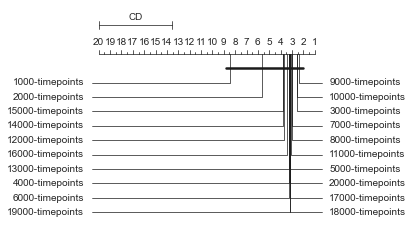

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5,
                                      filename="../../figures/cd_ablation_sliding_window.pdf")

Let's compute pairwise wins/losses.

In [11]:
selection = "10000-timepoints"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

10000-timepoints vs 1000-timepoints: (wins/ties/losses): 8/6/7
10000-timepoints vs 2000-timepoints: (wins/ties/losses): 6/10/5
10000-timepoints vs 3000-timepoints: (wins/ties/losses): 3/13/5
10000-timepoints vs 4000-timepoints: (wins/ties/losses): 4/15/2
10000-timepoints vs 5000-timepoints: (wins/ties/losses): 3/16/2
10000-timepoints vs 6000-timepoints: (wins/ties/losses): 3/17/1
10000-timepoints vs 7000-timepoints: (wins/ties/losses): 2/17/2
10000-timepoints vs 8000-timepoints: (wins/ties/losses): 2/17/2
10000-timepoints vs 9000-timepoints: (wins/ties/losses): 0/19/2
10000-timepoints vs 11000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 12000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 13000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 14000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 15000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 16000-timepoints: (wins/ties/losses): 3/18/0
10000-timepoints vs 17000-timepoint

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4008/224482068.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4008/224482068.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


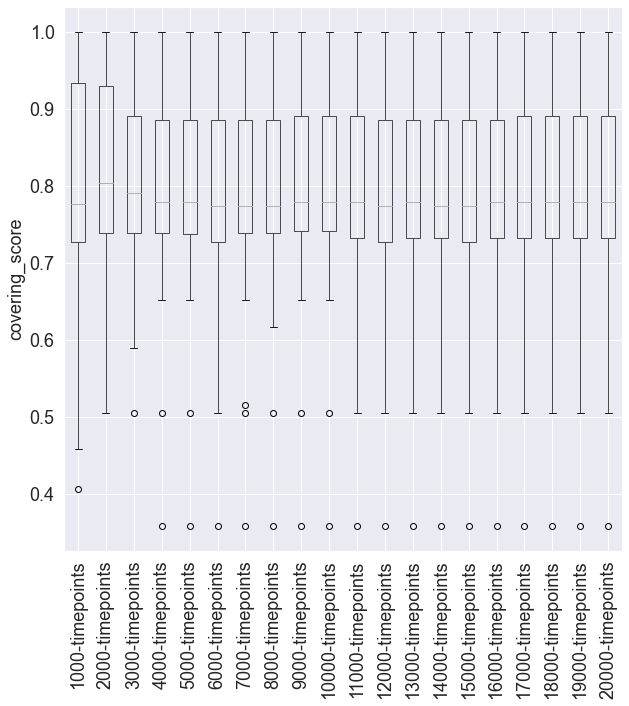

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig("../../figures/bp_ablation_sliding_window.pdf", bbox_inches="tight") 